<a href="https://colab.research.google.com/github/sugato1398/Internship-scripts/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  !pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sugato","key":"5266d96ba3bafe2c40e903ff048692e5"}'}

In [0]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn
from torchsummary import summary
from torch import optim
from PIL import Image
from torch.utils.data.sampler import WeightedRandomSampler


In [0]:
!cp kaggle.json ~/.kaggle/


In [0]:
!ls -a

.	     sampleSubmission.csv.zip  test.zip.004  trainLabels.csv
..	     sample.zip		       test.zip.005  trainLabels.csv.zip
.config      test.zip.001	       test.zip.006  train.zip.001
kaggle.json  test.zip.002	       test.zip.007
sample_data  test.zip.003	       train


In [0]:
%matplotlib inline

In [0]:
!kaggle datasets list


ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          45584  
lava18/google-play-store-apps                                Google Play Store Apps                                2MB  2019-02-03 13:55:47          56877  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          30077  
jessicali9530/stanford-dogs-dataset                          Stanford Dogs Dataset                               735MB  2019-02-13 05:45:25           3933  
russellyates88/suicide-rates-overview-1985-to-2016        

In [0]:
!kaggle datasets list -s cats

ref                                                  title                                           size  lastUpdated          downloadCount  
---------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
rahul897/catsdogs                                    cats&dogs                                      216MB  2018-01-05 15:02:32           1629  
nafisur/dogs-vs-cats                                 Dogs_vs_cats                                   217MB  2018-04-25 08:01:49            822  
mauricefreund/cats-vs-dogs                           cats_vs_dogs                                     6MB  2017-11-06 13:28:08            229  
crawford/cat-dataset                                 Cat Dataset                                      2GB  2018-02-16 23:41:25           4064  
mmoreaux/audio-cats-and-dogs                         Audio Cats and Dogs                             49MB  2017-10-05 09:40:26          

In [0]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 267M/271M [00:04<00:00, 49.9MB/s]
100% 271M/271M [00:04<00:00, 57.5MB/s]
 97% 529M/544M [00:08<00:00, 61.1MB/s]
100% 544M/544M [00:08<00:00, 66.0MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 93.0MB/s]


In [0]:
import os
os.listdir('.')

['.config', 'kaggle.json', 'sample_data']

10000

In [0]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin

In [0]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/100.jpg            
  inflating: test/1000.jpg           
  inflating: test/10000.jpg          
  inflating: test/10001.jpg          
  inflating: test/10002.jpg          
  inflating: test/10003.jpg          
  inflating: test/10004.jpg          
  inflating: test/10005.jpg          
  inflating: test/10006.jpg          
  inflating: test/10007.jpg          
  inflating: test/10008.jpg          
  inflating: test/10009.jpg          
  inflating: test/1001.jpg           
  inflating: test/10010.jpg          
  inflating: test/10011.jpg          
  inflating: test/10012.jpg          
  inflating: test/10013.jpg          
  inflating: test/10014.jpg          
  inflating: test/10015.jpg          
  inflating: test/10016.jpg          
  inflating: test/10017.jpg          
  inflating: test/10018.jpg          
  inflating: test/10019.jpg          
  inflating:

In [0]:
img=Image.open('train/cats/cat.278.jpg')
x=transforms.functional.to_tensor(img)
x.shape


torch.Size([3, 245, 350])

In [0]:
os.listdir('train/dogs')

['dog.12155.jpg',
 'dog.1087.jpg',
 'dog.1482.jpg',
 'dog.11229.jpg',
 'dog.3721.jpg',
 'dog.8356.jpg',
 'dog.9643.jpg',
 'dog.7873.jpg',
 'dog.6237.jpg',
 'dog.6524.jpg',
 'dog.428.jpg',
 'dog.8853.jpg',
 'dog.6401.jpg',
 'dog.12056.jpg',
 'dog.8261.jpg',
 'dog.2289.jpg',
 'dog.6586.jpg',
 'dog.2329.jpg',
 'dog.2718.jpg',
 'dog.7328.jpg',
 'dog.8689.jpg',
 'dog.8908.jpg',
 'dog.8428.jpg',
 'dog.168.jpg',
 'dog.1143.jpg',
 'dog.10029.jpg',
 'dog.8440.jpg',
 'dog.6761.jpg',
 'dog.2432.jpg',
 'dog.806.jpg',
 'dog.1914.jpg',
 'dog.40.jpg',
 'dog.2404.jpg',
 'dog.792.jpg',
 'dog.11470.jpg',
 'dog.1654.jpg',
 'dog.6869.jpg',
 'dog.6585.jpg',
 'dog.9378.jpg',
 'dog.5804.jpg',
 'dog.9479.jpg',
 'dog.8796.jpg',
 'dog.2959.jpg',
 'dog.5421.jpg',
 'dog.1316.jpg',
 'dog.6597.jpg',
 'dog.5233.jpg',
 'dog.8596.jpg',
 'dog.4003.jpg',
 'dog.5201.jpg',
 'dog.1678.jpg',
 'dog.10894.jpg',
 'dog.8410.jpg',
 'dog.357.jpg',
 'dog.4486.jpg',
 'dog.5204.jpg',
 'dog.3232.jpg',
 'dog.2876.jpg',
 'dog.4643.jpg'

In [0]:
img=plt.imread('valid/cats/cat.5.jpg')
im=transforms.functional.to_tensor(img)
im[0]

tensor([[0.0118, 0.0078, 0.0039,  ..., 0.9569, 0.9647, 0.9647],
        [0.0000, 0.0000, 0.0000,  ..., 0.9451, 0.9412, 0.9412],
        [0.0000, 0.0000, 0.0000,  ..., 0.9255, 0.9333, 0.9373],
        ...,
        [0.5059, 0.4000, 0.2980,  ..., 0.6627, 0.7647, 0.8314],
        [0.2941, 0.2078, 0.1490,  ..., 0.6588, 0.6824, 0.7098],
        [0.1882, 0.1216, 0.1059,  ..., 0.7569, 0.6980, 0.6471]])

In [0]:
os.mkdir('train/cats')
os.mkdir('train/dogs')


In [0]:
os.mkdir('valid')
os.mkdir('valid/cats')
os.mkdir('valid/dogs')

In [0]:
os.listdir('valid')

['dogs', 'cats']

In [0]:
# code to split 20000 samples to train set and 5000 samples to validation set
cat_c=0
dog_c=0
for file in os.listdir('train'):
  filename=os.fsdecode(file)
  if filename.startswith('cat.'):
    if cat_c>=10000:
      os.rename(f'train/{filename}',f'valid/cats/{filename}')
    else:           
      os.rename(f'train/{filename}',f'train/cats/{filename}')
    cat_c+=1
    
  if filename.startswith('dog.'):
    if dog_c>=10000:
      os.rename(f'train/{filename}',f'valid/dogs/{filename}')
    else:
      os.rename(f'train/{filename}',f'train/dogs/{filename}')
    dog_c+=1
    


In [0]:
os.mkdir('train2')
os.mkdir('train2/cats')
os.mkdir('train2/dogs')


In [0]:
os.system('cp valid/cats/cat.5.jpg  train2/cats/cat.5.jpg')

0

In [0]:
os.system('cp train/dogs/dog.168.jpg train2/dogs/dog.168.jpg')

0

In [0]:
os.listdir('train2/dogs')

['dog.168.jpg']

In [0]:
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'valid':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [0]:
train_dat=datasets.ImageFolder(root='train2',transform=image_transforms['train'])

In [0]:
x,y=train_dat[0]


In [0]:
valid_dat=datasets.ImageFolder(root='valid',transform=image_transforms['valid'])

In [0]:
train_loader=DataLoader(train_dat,batch_size=200,shuffle=True)
valid_loader=DataLoader(valid_dat,batch_size=200,shuffle=True)

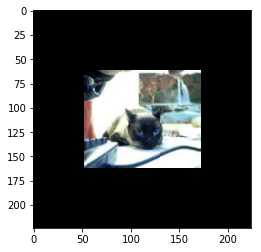

In [0]:
x,y=train_dat[0]
plt.imshow(  x.permute(1, 2, 0)  )


In [0]:
x[0][0]

tensor([0.0118, 0.0118, 0.0118,  ..., 0.9647, 0.9647, 0.9647])

In [0]:
tritr=iter(train_loader)
feat,lab=next(tritr)
feat.size(0)

200

In [0]:
model=models.resnet152(pretrained=True)

In [0]:
num_feas = model.fc.in_features

for param in model.parameters():
  param.requires_grad=False
  

In [0]:
model.fc = nn.Linear(num_feas, 2)

In [0]:
'''model.classifier[6]=nn.Sequential(nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, 2),                   
                      nn.LogSoftmax(dim=1))'''

model.classifier = torch.nn.Sequential(torch.nn.Linear(25088, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Dropout(p=0.5),
                                       torch.nn.Linear(4096, 2))
for index, parma in enumerate(model.classifier.parameters()):
    if index == 6:
        parma.requires_grad = True



In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

In [0]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=2, bias=True)
)

In [0]:
model.classifier[6].in_features

4096

In [0]:
num_epochs=10

In [0]:
summary(model,
        input_size=(3, 224, 224),
        batch_size=100,
       device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [100, 64, 112, 112]           9,408
       BatchNorm2d-2        [100, 64, 112, 112]             128
              ReLU-3        [100, 64, 112, 112]               0
         MaxPool2d-4          [100, 64, 56, 56]               0
            Conv2d-5          [100, 64, 56, 56]           4,096
       BatchNorm2d-6          [100, 64, 56, 56]             128
              ReLU-7          [100, 64, 56, 56]               0
            Conv2d-8          [100, 64, 56, 56]          36,864
       BatchNorm2d-9          [100, 64, 56, 56]             128
             ReLU-10          [100, 64, 56, 56]               0
           Conv2d-11         [100, 256, 56, 56]          16,384
      BatchNorm2d-12         [100, 256, 56, 56]             512
           Conv2d-13         [100, 256, 56, 56]          16,384
      BatchNorm2d-14         [100, 256,

In [0]:
model=model.to('cuda')


In [0]:
torch.cuda.is_available()

True

In [0]:
for epoch in range(num_epochs):
  
  model.train()
  train_loss = 0.0
  valid_loss = 0.0

  train_acc = 0
  valid_acc = 0
  
  # training data
  for i,(data,target) in enumerate(train_loader):
    data,target=data.cuda(),target.cuda()
    optimizer.zero_grad()
    out=model(data)
    out_loss=loss(out,target)
    out_loss.backward()
    optimizer.step()
    train_loss+=out_loss.item()*data.size(0)
    
    # calculating accuracy
    _,pred=torch.max(out,1)
    correct_pred=pred.eq(target.data.view_as(pred))
    accuracy=torch.mean(correct_pred.type(torch.FloatTensor))
    train_acc+=accuracy.item()*data.size(0)
    
  with torch.no_grad():
    model.eval()

    # validating data
    for data,label in valid_loader:
      data,label=data.cuda(),label.cuda()
      out=model(data)

      vloss=loss(out,label)
      valid_loss+=vloss.item()*data.size(0)

      _,pred=torch.max(out,1)
      correct_pred=pred.eq(label.data.view_as(pred))
      accuracy=torch.mean(correct_pred.type(torch.FloatTensor))
      valid_acc+=accuracy.item()*data.size(0)

    train_loss=train_loss/len(train_loader.dataset)
    valid_loss=valid_loss/len(train_loader.dataset)

    train_acc=train_acc/len(train_loader.dataset)
    valid_acc=valid_acc/len(train_loader.dataset)
    model.optimizer=optimizer
      
  print('Epoch: {}  Train Loss:{}   valid Loss:{}   Train acc:{}  Valid  acc:{}'.format(epoch,train_loss,valid_loss,train_acc,valid_acc))
  
    

Epoch: 0  Train Loss:0.18876273907721042   valid Loss:0.019196691438555718   Train acc:0.9409500077366829  Valid  acc:0.24445000171661377
Epoch: 1  Train Loss:0.07741691213101148   valid Loss:0.0148660902492702   Train acc:0.9778500127792359  Valid  acc:0.24550000190734864
Epoch: 2  Train Loss:0.06387882191687823   valid Loss:0.013202635385096074   Train acc:0.9807000130414962  Valid  acc:0.24585000276565552
Epoch: 3  Train Loss:0.05992461312562227   valid Loss:0.012180799022316932   Train acc:0.9814500135183334  Valid  acc:0.24615000307559967
Epoch: 4  Train Loss:0.0554366447404027   valid Loss:0.011687771752476692   Train acc:0.9822000151872635  Valid  acc:0.24610000371932983
Epoch: 5  Train Loss:0.05311323080211878   valid Loss:0.011004264391958713   Train acc:0.9826500123739242  Valid  acc:0.2462500023841858
Epoch: 6  Train Loss:0.05188079806044698   valid Loss:0.010774822868406773   Train acc:0.9832000124454499  Valid  acc:0.24630000233650207
Epoch: 7  Train Loss:0.050319898296147

In [0]:
feat=feat.cuda()
lab=lab.cuda()
o=model(feat)
l=loss(o,lab)
print(l)

SyntaxError: ignored

In [0]:
a=torch.randn(4,4)

In [0]:
a

tensor([[-0.3707,  0.4130,  0.0848, -0.4327],
        [-0.0394,  1.1061, -1.0861, -0.9910],
        [-0.2494,  0.1362,  0.2889,  0.2378],
        [-1.5089, -0.0065, -0.4162,  1.6240]])

In [0]:
c,d=torch.max(a,1)

In [0]:
m,n=torch.max(o,1)
m,n

(tensor([-0.5183, -0.5691, -0.6698, -0.5584, -0.6063, -0.5349, -0.5658, -0.6331,
         -0.4129, -0.5881, -0.5988, -0.6160, -0.5484, -0.5370, -0.4828, -0.6374,
         -0.6525, -0.3905, -0.5132, -0.6642, -0.6618, -0.5594, -0.5907, -0.6357,
         -0.6017, -0.6255, -0.5714, -0.3542, -0.6193, -0.5210, -0.3874, -0.6481,
         -0.6674, -0.4441, -0.6315, -0.5848, -0.5326, -0.4909, -0.3962, -0.6854,
         -0.4148, -0.4940, -0.3367, -0.5530, -0.5762, -0.5634, -0.5062, -0.5756,
         -0.5223, -0.5050, -0.5719, -0.3705, -0.6559, -0.4790, -0.6076, -0.6524,
         -0.6000, -0.6150, -0.5635, -0.5789, -0.6276, -0.5535, -0.5174, -0.5913,
         -0.6147, -0.6190, -0.5082, -0.5537, -0.4713, -0.5716, -0.5039, -0.6013,
         -0.6659, -0.6096, -0.6678, -0.6497, -0.6929, -0.4075, -0.4001, -0.6279,
         -0.6835, -0.5414, -0.5877, -0.6846, -0.5017, -0.5996, -0.5304, -0.6156,
         -0.4077, -0.6744, -0.4057, -0.6667, -0.6221, -0.5847, -0.6277, -0.5870,
         -0.3752, -0.6508, -

In [0]:
b=torch.squeeze(n.eq(lab))

In [0]:
torch.mean(b.type(torch.FloatTensor))

tensor(0.5900)

In [0]:
len(train_loader)

200

In [0]:
torch.cuda.is_available()

True

# Retinopathy experiments

In [0]:
import pandas as pd
import os
from fastai.vision import *
import fastai
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from torch.utils.data.sampler import WeightedRandomSampler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!kaggle competitions download -c diabetic-retinopathy-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 6, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


KeyboardInterrupt: ignored

In [0]:
  #os.listdir()

In [0]:
!unzip sample.zip

Archive:  sample.zip
   creating: sample/
  inflating: sample/10_left.jpeg     
  inflating: sample/10_right.jpeg    
  inflating: sample/13_left.jpeg     
  inflating: sample/13_right.jpeg    
  inflating: sample/15_left.jpeg     
  inflating: sample/15_right.jpeg    
  inflating: sample/16_left.jpeg     
  inflating: sample/16_right.jpeg    
  inflating: sample/17_left.jpeg     
  inflating: sample/17_right.jpeg    


In [0]:
os.listdir('sample')

FileNotFoundError: ignored

In [0]:
for files in os.listdir('/content/train'):
  os.remove('/content/train/'+files)
os.rmdir('/content/train')

In [0]:
open_image('../content/sample/17_right.jpeg').show()

In [0]:
for file in os.listdir('/content'):
  if file.startswith('test'):
    os.remove('/content/'+file)

In [0]:
os.remove('/content/train.zip.002')
os.remove('/content/train.zip.003')
os.remove('/content/train.zip.004')
os.remove('/content/train.zip.005')

In [0]:
!7z e train.zip.001


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8388608000 bytes (8000 MiB)

Extracting archive: train.zip.001
  0% 1 Open             3% 256 Open               6% 512 Open               9% 768 Open              12% 1024 Open               15% 1280 Open               18% 1536 Open               21% 1792 Open               24% 2048 Open               27% 2304 Open               33% 2816 Open               39% 3328 Open               46% 3840 Open

8423

In [0]:
for files in os.listdir():
  if files.startswith('test'):
    print(files)
    

test.zip.001
test.zip.007


In [0]:
os.getcwd()

'/content'

In [0]:
os.mkdir('/content/train')

In [0]:
for files in os.listdir('/content/train'):
  if files=='train':
    print('found!!')
  

FileNotFoundError: ignored

In [0]:
for files in os.listdir():
  if files.endswith('.jpeg'):
    os.rename('/content/'+files,'/content/train/'+files)

In [0]:
len(os.listdir('/content/train'))

16808

In [0]:
os.remove('/content/train/194_right.jpeg')

In [0]:
for file in os.listdir('/content/train'):
  os.remove('/content/train/'+file)

In [0]:
! unzip trainLabels.csv.zip

Archive:  trainLabels.csv.zip
  inflating: trainLabels.csv         


In [0]:
names={0 : 'No_DR',
1 : 'Mild',
2 : 'Moderate',
3 : 'Severe',
4 : 'Proliferative_DR'}

In [0]:
ser=df2['level']
ser

0        0
1        0
2        0
3        0
4        1
5        2
6        4
7        4
8        0
9        1
92       0
93       0
94       0
95       0
96       0
97       0
98       0
99       0
100      0
101      0
102      1
103      1
104      0
105      0
106      0
107      0
108      0
109      0
110      0
111      0
        ..
15548    0
15549    0
15550    0
15551    0
15552    0
15553    0
15554    0
15555    0
15556    2
15557    2
15558    0
15559    0
15560    0
15561    0
15562    2
15563    4
15564    0
15565    0
15566    2
15567    2
15568    2
15569    2
15570    0
15571    0
15572    1
15573    1
15574    0
15575    0
15576    0
15577    0
Name: level, Length: 8407, dtype: int64

In [0]:
df2['level']

0                   No_DR
1                   No_DR
2                   No_DR
3                   No_DR
4                    Mild
5                Moderate
6        Proliferative_DR
7        Proliferative_DR
8                   No_DR
9                    Mild
92                  No_DR
93                  No_DR
94                  No_DR
95                  No_DR
96                  No_DR
97                  No_DR
98                  No_DR
99                  No_DR
100                 No_DR
101                 No_DR
102                  Mild
103                  Mild
104                 No_DR
105                 No_DR
106                 No_DR
107                 No_DR
108                 No_DR
109                 No_DR
110                 No_DR
111                 No_DR
               ...       
15548               No_DR
15549               No_DR
15550               No_DR
15551               No_DR
15552               No_DR
15553               No_DR
15554               No_DR
15555       

had a problem with mapping the values with strings, reason : the shorter dataframe df2 was created as a view of larger df , thats y there was copyerror even when .loc was used. problem was solved by using .copy() the moment df2 was created from df using boolean mask

In [0]:
df2.loc[:,['level']]=ser.map(names).values.reshape(len(ser),1)

In [0]:
df=pd.read_csv('trainLabels.csv')
df.head()


image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1

35126

In [0]:
df2=pd.DataFrame(columns=df.columns)

In [0]:
df2=df[df.image.isin(files)].copy()
df2.groupby(['level']).count()

image
level       
0       6149
1        588
2       1283
3        221
4        166

In [0]:
df2

image  level
0          10_left      0
1         10_right      0
2          13_left      0
3         13_right      0
4          15_left      1
5         15_right      2
6          16_left      4
7         16_right      4
8          17_left      0
9         17_right      1
92        100_left      0
93       100_right      0
94        102_left      0
95       102_right      0
96        104_left      0
97       104_right      0
98        108_left      0
99       108_right      0
100       111_left      0
101      111_right      0
102       114_left      1
103      114_right      1
104       115_left      0
105      115_right      0
106       117_left      0
107      117_right      0
108       119_left      0
109      119_right      0
110       122_left      0
111      122_right      0
...            ...    ...
15548   19474_left      0
15549  19474_right      0
15550   19475_left      0
15551  19475_right      0
15552   19476_left      0
15553  19476_right      0
15554   19477_left      0
15555  19477_right      0
15556   19478_left      2
15557  19478_right      2
15558   19481_left      0
15559  19481_right      0
15560   19484_left      0
15561  19484_right      0
15562   19485_left      2
15563  19485_right      4
15564   19486_left      0
15565  19486_right      0
15566   19489_left      2
15567  19489_right      2
15568   19490_left      2
15569  19490_right      2
15570   19491_left      0
15571  19491_right      0
15572   19493_left      1
15573  19493_right      1
15574   19494_left      0
15575  19494_right      0
15576   19498_left      0
15577  19498_right      0

[8407 rows x 2 columns]

In [0]:
df2['level'].shape

(8407,)

In [0]:
len(os.listdir('/content/drive/My Drive/retinopathy/moderate'))

5286

## Data Modification

In [0]:
os.mkdir('/content/train2')
os.mkdir('/content/train2/Severe')
os.mkdir('/content/train2/Moderate')
os.mkdir('/content/train2/Mild')
os.mkdir('/content/train2/Proliferative_DR')

In [0]:
path='/content/drive/My Drive/retinopathy/moderate'

for file in os.listdir(path):
  if file.endswith('.jpeg'):
    img=cv2.imread(path+'/'+file)
    img2=cv2.addWeighted(img,11,cv2.cv2.GaussianBlur(img,(0,0),7),-11,90)
    cv2.imwrite('/content/train2/Moderate/'+file,img2)


In [0]:
path='/content/drive/My Drive/retinopathy/extreme_df'

for file in os.listdir(path):
  if file.endswith('.jpeg'):
    img=cv2.imread(path+'/'+file)
    img2=cv2.addWeighted(img,11,cv2.cv2.GaussianBlur(img,(0,0),7),-11,90)
    cv2.imwrite('/content/train2/Proliferative_DR/'+file,img2)

In [0]:
len(os.listdir('/content/drive/My Drive/retinopathy/extreme_df'))

667

In [0]:
len(os.listdir('/content/train2/Mild/'))

2428

In [0]:
os.rmdir('/content/train2/Moderate')

In [0]:
for file in os.listdir('/content/train2/Moderate'):
  os.remove('/content/train2/Moderate/'+file)

In [0]:
os.mkdir('/content/train2/Mild')

In [0]:
os.mkdir('/content/train2/extreme_df')
os.mkdir('/content/train2/no_dr')

In [0]:
path='/content/drive/My Drive/retinopathy/moderate'
count=0
total=len(os.listdir(path))
for file in os.listdir(path):
  if file.endswith('.jpeg'):
    img= cv2.imread(path+'/'+file)
    try:
      a=img.shape
    except:
      print(file)
      continue
    if img.shape[0]!=400 or img.shape[1]!=400:
      try:
        img=cv2.resize(img,(400,400))
      except:
        continue
    cv2.imwrite('/content/train2/Moderate/'+file,img)
    count+=1
    print('\r {:.2f}%'.format(count*100/total),end='')

 15.01%13254_left.jpeg
 99.98%

data oversampling by saving a flipped image (flipping the image vertically) , change to grayscale and calculate the average pixelvalue, calculate the corresponding brightness, and save images with 
1. original image
2. original image with brightness
3. original image with brightness - 0.3
4. flipped image
5. flipped image with brightness
6.flipped image with brightness - 0.3

the formula to calculate brightness was found by trial and error and calculated by linear interpolation

In [0]:
from PIL import Image,ImageEnhance


In [0]:
path='/content/drive/My Drive/retinopathy/extreme_df'
path2='/content/train2/Proliferative_DR/'

for file in os.listdir(path):
  if file.endswith('.jpeg'):
    img=Image.open(path+'/'+file)
    img=img.resize((400,300),Image.ANTIALIAS)
    
    # get average pixel value --- judge how bright the image is 
    img1=img.convert('L')
    img1.thumbnail((1,1))
    pixel_val=img1.getpixel((0,0))
    
    # find image brightness by rough linear interpolation , used parameters (pixel_val, brightness) : (24,4.5) , (133,0.5)
    brightness=5.3807 - 0.0367 * pixel_val
    
    # save normal resized image
    img.save(path2+file)
    
    #save image with brightness
    #enhancer=ImageEnhance.Brightness(img)
    
    #enhanced1=enhancer.enhance(brightness)
    #name=file[:-5]+'_1'+file[-5:]
    #enhanced1.save(path2+name)
    
    rotate=img.rotate(180)
    name=file[:-5]+'_2'+file[-5:]
    rotate.save(path2+name)
    
    #enhanced2=enhancer.enhance(brightness-0.3)
    #name=file[:-5]+'_2'+file[-5:]
    #enhanced2.save(path2+name)
    
    # save flipped image
    flip=img.transpose(Image.FLIP_LEFT_RIGHT)
    name=file[:-5]+'_3'+file[-5:]
    flip.save(path2+name)
    
    # save flipped images with brightness
    
    #enhancer=ImageEnhance.Brightness(flip)
    
    #enhanced1=enhancer.enhance(brightness)
    #name=file[:-5]+'_4'+file[-5:]
    #enhanced1.save(path2+name)
    
    rotate=flip.rotate(180)
    name=file[:-5]+'_5'+file[-5:]
    rotate.save(path2+name)
    
    #enhanced2=enhancer.enhance(brightness-0.3)
    #name=file[:-5]+'_5'+file[-5:]
    #enhanced2.save(path2+name)
    


In [0]:
img=cv2.imread('/content/drive/My Drive/retinopathy/no_dr/10007_right.jpeg')
cv2_imshow(img)

In [0]:
len(os.listdir('/content/train2/Mild'))

0

In [0]:
files=os.listdir('/content/train2')
files=[x[:-5] for x in files]
'''for img in df['image']:
  if image in files:
    '''
len(files)

8407

In [0]:
path='/content/train2'
for direc in os.listdir(path):
  print("{}\t :{}".format(direc,len(os.listdir(path+'/'+direc))))
  

Mild	 :0
Severe	 :0
Proliferative_DR	 :0
Moderate	 :0


In [0]:
os.mkdir('exp')

In [0]:
import shutil

In [0]:
path1='/content/exp'
path2='/content/drive/My Drive/retinopathy/extreme_df'
file1=os.listdir(path2)[0]
p1=path2+'/'+file1
p2=path1
shutil.copy(p1,p2)


'/content/exp/22568_left.jpeg'

In [0]:
len(os.listdir('/content/drive/My Drive/new_train/mild_moderate'))

2110

In [0]:
count=0
for file in os.listdir('/content/drive/My Drive/new_train/mild_moderate'):
  count+=1
  if count==500:
    break
  os.remove('/content/drive/My Drive/new_train/mild_moderate/'+file)

In [0]:
path='/content/drive/My Drive/retinopathy/mild'
path2='/content/drive/My Drive/new_train/mild_moderate'
total=len(os.listdir(path))
count=0
for file in os.listdir(path):
  count+=1
  if count==300:
    break
  p1=path+'/'+file
  shutil.copy(p1,path2)
  print('\r {:.2f}%'.format(count/total),end='')

 0.12%

In [0]:
from PIL import Image

In [0]:
os.rmdir('/content/train2/Mild')

In [0]:
count=0
for file in os.listdir('/content/drive/My Drive/new_train/severe'):
  img=Image.open('/content/drive/My Drive/new_train/severe/'+file)
  img.save('/content/train2/Moderate/'+file)  

In [0]:
len(os.listdir('/content/drive/My Drive/new_train/moderate-mild'))

1800

In [0]:
remove_folder('train2/DR')

In [0]:
os.mkdir('train2')
os.mkdir('train2/NO_DR')
os.mkdir('train2/DR')

In [0]:
len(os.listdir('/content/drive/My Drive/new_train/moderate'))

2311

In [0]:
path='/content/drive/My Drive/new_train/moderate'
path2='/content/train2/DR'
total=len(os.listdir(path))
count=0
for file in os.listdir(path):
  if file.endswith('.jpeg'):
    count+=1
    p1=path+'/'+file
    shutil.copy(p1,path2)
  if count==3000:
    break
  #print('{:.2f}%'.format(count/total))

In [0]:
os.rename('/content/train2/Moderate','/content/train2/DR')

In [0]:
def accuracy_my(input:Tensor, targs:Tensor)->Rank0Tensor:
    "Computes accuracy with `targs` when `input` is bs * n_classes."
    n = targs.shape[0]
    input = input.argmax(dim=-1).view(n,-1)
    targs = targs.view(n,-1).long()
    return (input==targs).float().mean()

In [0]:
from sklearn.metrics import cohen_kappa_score
def quadratic_kappa(y_hat, y):
    return torch.tensor(cohen_kappa_score(torch.argmax(y_hat,1), y, weights='quadratic'),device='cuda:0')

In [9]:
len(os.listdir('/content/drive/My Drive/level0and234/No DR'))

7100



```
# This is formatted as code
```

#### loading data fastai

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
path='/content/drive/My Drive/level0and234'


In [0]:
np.random.seed(30)
data=ImageDataBunch.from_folder(path,train=path,valid_pct=0.2,ds_tfms=get_transforms(),size=224,bs=20).normalize(imagenet_stats)

In [0]:
np.random.seed(30)

dr_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data = ImageDataBunch.from_df( '/content',folder='/train2',df=df2,valid_pct=0.2, size=224, suffix='.jpeg', label_delim = ' ', ds_tfms=dr_tfms,bs=64).normalize(imagenet_stats)

NameError: ignored

In [12]:
data.classes

['No DR', 'level234']

In [0]:
train_labels = data.train_dl.dataset.y.items
_, counts = np.unique(train_labels,return_counts=True)
class_weights = 1./counts
weights = class_weights[train_labels]
data.train_dl.dl.batch_sampler = BatchSampler(WeightedRandomSampler(weights,len(data.train_dl.dataset)), data.train_dl.batch_size,False)

In [0]:
labels = []
for img,target in data.train_dl:
    labels.append(target)
labels = torch.cat(labels)
plt.hist(labels)

KeyboardInterrupt: ignored

In [0]:
class OverSamplingCallback(Callback):
    def __init__(self):
        self.labels = model.data.train_dl.dataset.y.items
        _, counts = np.unique(self.labels,return_counts=True)
        self.weights = torch.DoubleTensor((1/counts)[self.labels])
        
    def on_train_begin(self, **kwargs):
        model.data.train_dl.dl.batch_sampler = BatchSampler(WeightedRandomSampler(weights,len(data.train_dl.dataset)), data.train_dl.batch_size,False) 

In [13]:
kappa = KappaScore()
kappa.weights = "quadratic"

model=cnn_learner(data,models.densenet161,metrics=[accuracy,kappa])

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth
100%|██████████| 115730790/115730790 [00:01<00:00, 96719171.44it/s]


In [0]:
def remove_folder(path):
  
  for file in os.listdir(path):
    os.remove(path+'/'+file)
  os.rmdir(path)

In [0]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


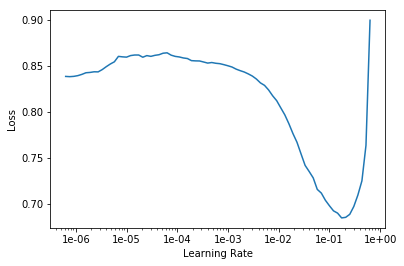

In [0]:
model.recorder.plot()

In [0]:
model.summary()

In [0]:
model.freeze()
model.fit_one_cycle(10,max_lr=9e-3)
model.unfreeze()
model.fit_one_cycle(10,max_lr=slice(1e-5,1e-3))

In [0]:
 for direc in os.listdir('/content/drive/My Drive/new_train'):
  print('{} :  {} '.format(direc,len(os.listdir('/content/drive/My Drive/new_train/'+direc))))

mild :  2428 
moderate :  2311 


AttributeError: ignored

In [0]:
right=0
for file in os.listdir('/content/drive/My Drive/testing/severe'):
  img=open_image('/content/drive/My Drive/testing/severe/'+file)
  pred_class,pred_indx,outp=model.predict(img)
  print('{}\t{} : {} '.format(file,pred_class,outp[pred_indx]))
  if pred_indx==0:
    right+=1
    
print('correct :{:.2f}'.format(right/len(os.listdir('/content/drive/My Drive/testing/severe'))))

3192_left.jpeg	mild_moderate : 0.9954423904418945 
3096_left.jpeg	mild_moderate : 0.9386717081069946 
3379_right.jpeg	extreme_df : 0.5006292462348938 
3422_right.jpeg	extreme_df : 0.9967032074928284 
2532_left.jpeg	mild_moderate : 0.9877136945724487 
3379_left.jpeg	mild_moderate : 0.9994900226593018 
3422_left.jpeg	extreme_df : 0.9951719641685486 
3096_right.jpeg	mild_moderate : 0.9819592833518982 
2132_right.jpeg	mild_moderate : 0.9962663054466248 
2496_right.jpeg	mild_moderate : 0.9810345768928528 
2275_left.jpeg	mild_moderate : 0.8487333655357361 
1420_right.jpeg	mild_moderate : 0.980445921421051 
1420_left.jpeg	mild_moderate : 0.9753724932670593 
1350_right.jpeg	mild_moderate : 0.9270763993263245 
1391_left.jpeg	mild_moderate : 0.9963100552558899 
2901_right.jpeg	mild_moderate : 0.9922864437103271 
11035_right.jpeg	mild_moderate : 0.8316807150840759 
11031_right.jpeg	mild_moderate : 0.9992891550064087 
10489_right.jpeg	mild_moderate : 0.9538992643356323 
11125_right.jpeg	mild_moder

In [0]:
img=open_image('/content/drive/My Drive/testing/severe/1002_left.jpeg')
pclass,indx,outp=model.predict(img)
pclass

Category mild_moderate

In [0]:
os.mkdir('test2')

In [0]:
shutil.copy('/content/drive/My Drive/testing/severe/1002_left.jpeg','/content/test2')

'/content/test2/1002_left.jpeg'

In [0]:
len(os.listdir('/content/test2'))

1

In [0]:
img=cv2.imread('/content/drive/My Drive/testing/severe/1002_left.jpeg')

In [0]:
img1=cv2.resize(img,(512,512))
img2=cv2.resize(img,(400,400))
img3=cv2.resize(img,(300,300))
img4=cv2.resize(img,(800,800))
cv2.imwrite('/content/test2/1.jpeg',img1)
cv2.imwrite('/content/test2/2.jpeg',img2)
cv2.imwrite('/content/test2/3.jpeg',img3)
cv2.imwrite('/content/test2/4.jpeg',img4)

True

In [0]:
model.data.c2i

{'extreme_df': 0, 'mild_moderate': 1, 'severe': 2}

In [0]:
img=cv2.imread('/content/drive/My Drive/new_train/severe/1002_left.jpeg')
imgg=cv2.imread('/content/test2/2.jpeg')

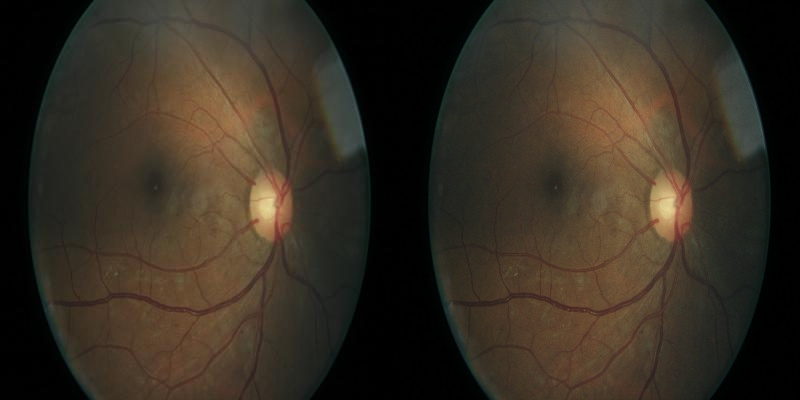

In [0]:
imggg=cv2.hconcat([img,imgg])
cv2_imshow(imggg)

In [0]:
img=open_image('/content/drive/My Drive/new_train/severe/1002_left.jpeg')
imgg=open_image('/content/test2/2.jpeg')

In [0]:
model.predict(img)

(Category severe, tensor(2), tensor([1.5047e-07, 1.6859e-05, 9.9998e-01]))

In [0]:
model.export('ret12_3_4.pkl')

In [0]:
model1=load_learner('content/drive/My Drive/new_train','ret12_3_4.pkl')

FileNotFoundError: ignored

In [0]:
pclass.

AttributeError: ignored

In [0]:
outp

tensor([9.6060e-01, 2.8104e-03, 1.9178e-02, 1.7310e-02, 9.6681e-05])

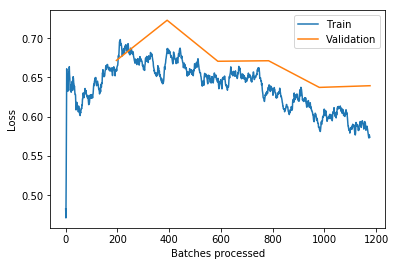

In [0]:
model.recorder.plot_losses()

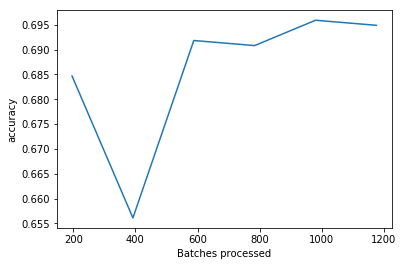

In [0]:
model.recorder.plot_metrics()

In [0]:
df2

image             level
0          10_left             No_DR
1         10_right             No_DR
2          13_left             No_DR
3         13_right             No_DR
4          15_left              Mild
5         15_right          Moderate
6          16_left  Proliferative_DR
7         16_right  Proliferative_DR
8          17_left             No_DR
9         17_right              Mild
92        100_left             No_DR
93       100_right             No_DR
94        102_left             No_DR
95       102_right             No_DR
96        104_left             No_DR
97       104_right             No_DR
98        108_left             No_DR
99       108_right             No_DR
100       111_left             No_DR
101      111_right             No_DR
102       114_left              Mild
103      114_right              Mild
104       115_left             No_DR
105      115_right             No_DR
106       117_left             No_DR
107      117_right             No_DR
108       119_left             No_DR
109      119_right             No_DR
110       122_left             No_DR
111      122_right             No_DR
...            ...               ...
15548   19474_left             No_DR
15549  19474_right             No_DR
15550   19475_left             No_DR
15551  19475_right             No_DR
15552   19476_left             No_DR
15553  19476_right             No_DR
15554   19477_left             No_DR
15555  19477_right             No_DR
15556   19478_left          Moderate
15557  19478_right          Moderate
15558   19481_left             No_DR
15559  19481_right             No_DR
15560   19484_left             No_DR
15561  19484_right             No_DR
15562   19485_left          Moderate
15563  19485_right  Proliferative_DR
15564   19486_left             No_DR
15565  19486_right             No_DR
15566   19489_left          Moderate
15567  19489_right          Moderate
15568   19490_left          Moderate
15569  19490_right          Moderate
15570   19491_left             No_DR
15571  19491_right             No_DR
15572   19493_left              Mild
15573  19493_right              Mild
15574   19494_left             No_DR
15575  19494_right             No_DR
15576   19498_left             No_DR
15577  19498_right             No_DR

[8407 rows x 2 columns]

In [0]:
len(model.recorder.losses)

525

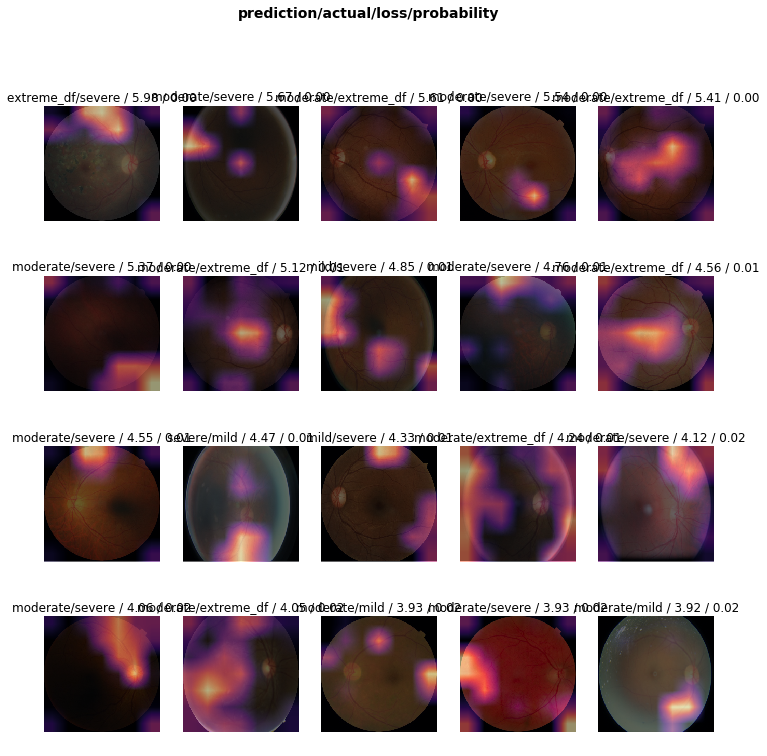

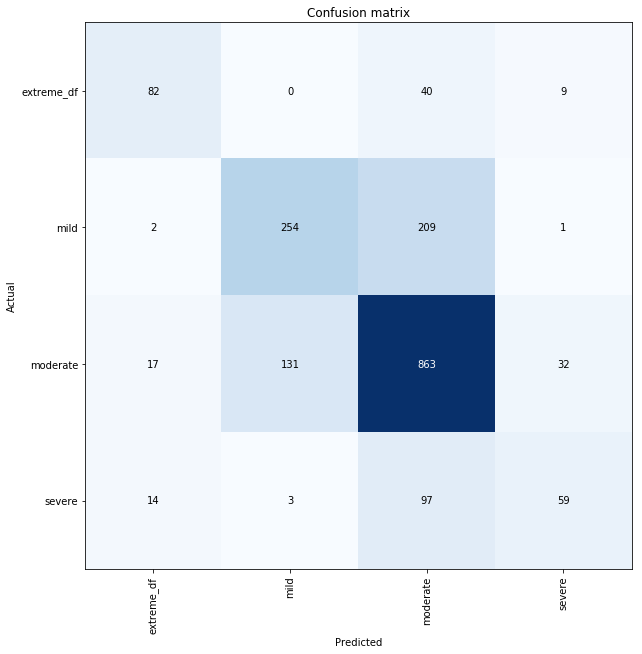

In [0]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_top_losses(20)
interp.plot_confusion_matrix(figsize=(9,9))

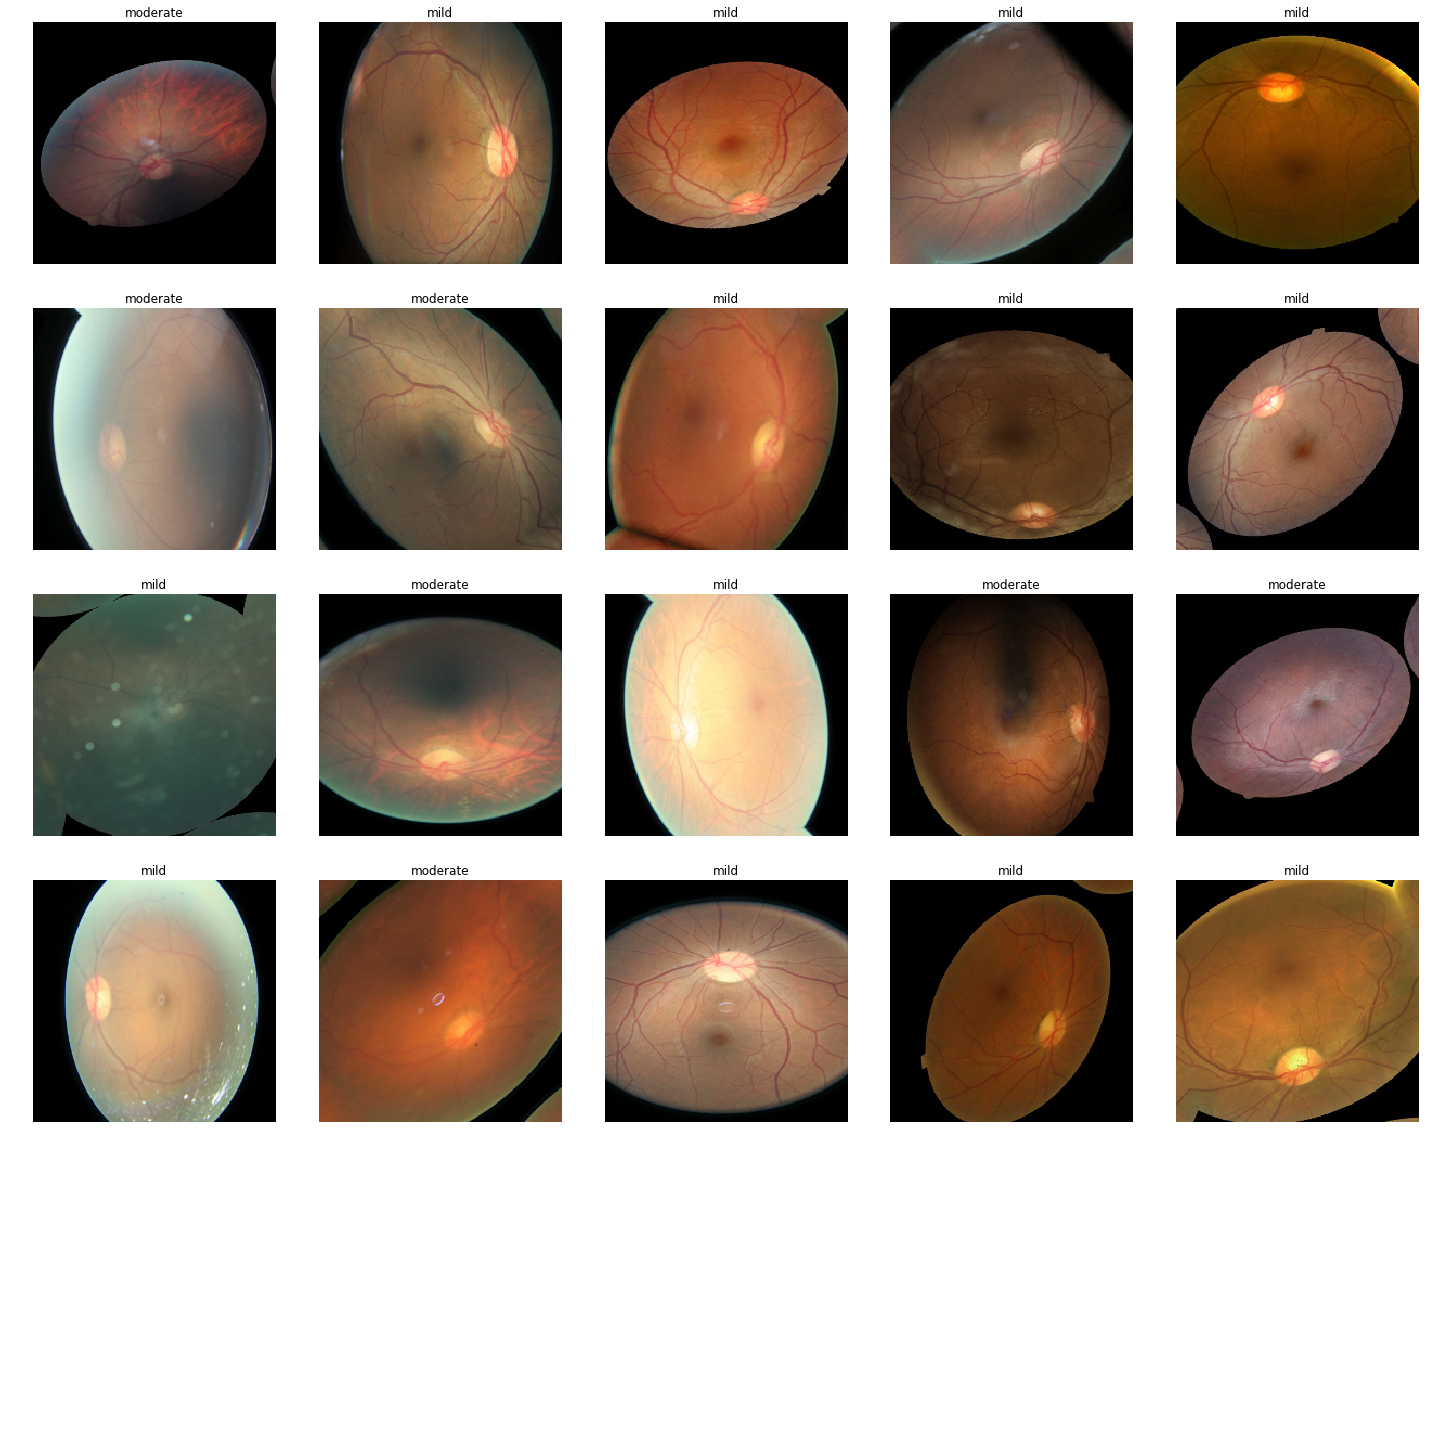

In [0]:
 gtdc data.show_batch()

In [0]:
os.remove('/content/train/194_right.jpeg')

In [0]:
os.listdir('/content/train')

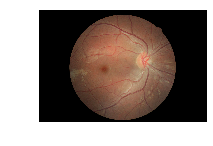

In [0]:
img=open_image('/content/train/14867_right.jpeg')
img.show()


In [0]:
img.shape

torch.Size([3, 3168, 4752])

In [0]:
img = cv2.imread('/content/train/15275_right.jpeg')

In [0]:
cv2_imshow(img)

In [0]:
df2[df2['image']=='15275_right']

image  level
12165  15275_right      0

## ROC curve

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_true=df.iloc[valid_idx].target,y_score=average_valid_predicts)
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr)
plt.show()

In [0]:
x,y=data.train_ds[2]

AttributeError: ignored

In [0]:
os.listdir('/content/train2')

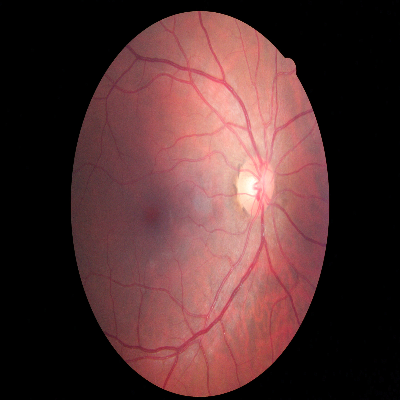

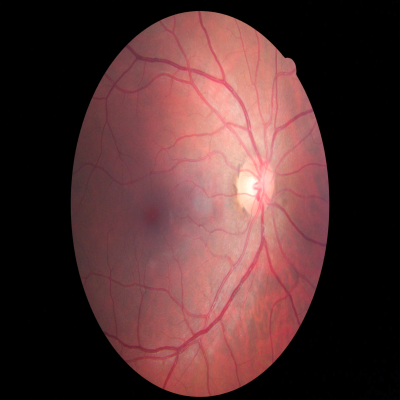

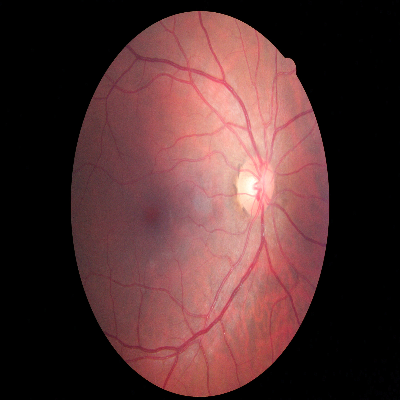

In [0]:
img1=cv2.resize(img,(400,400))
img2=cv2.resize(img,(400,400),interpolation=cv2.INTER_AREA)
img3=cv2.resize(img,(400,400),interpolation=cv2.INTER_CUBIC)

cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)

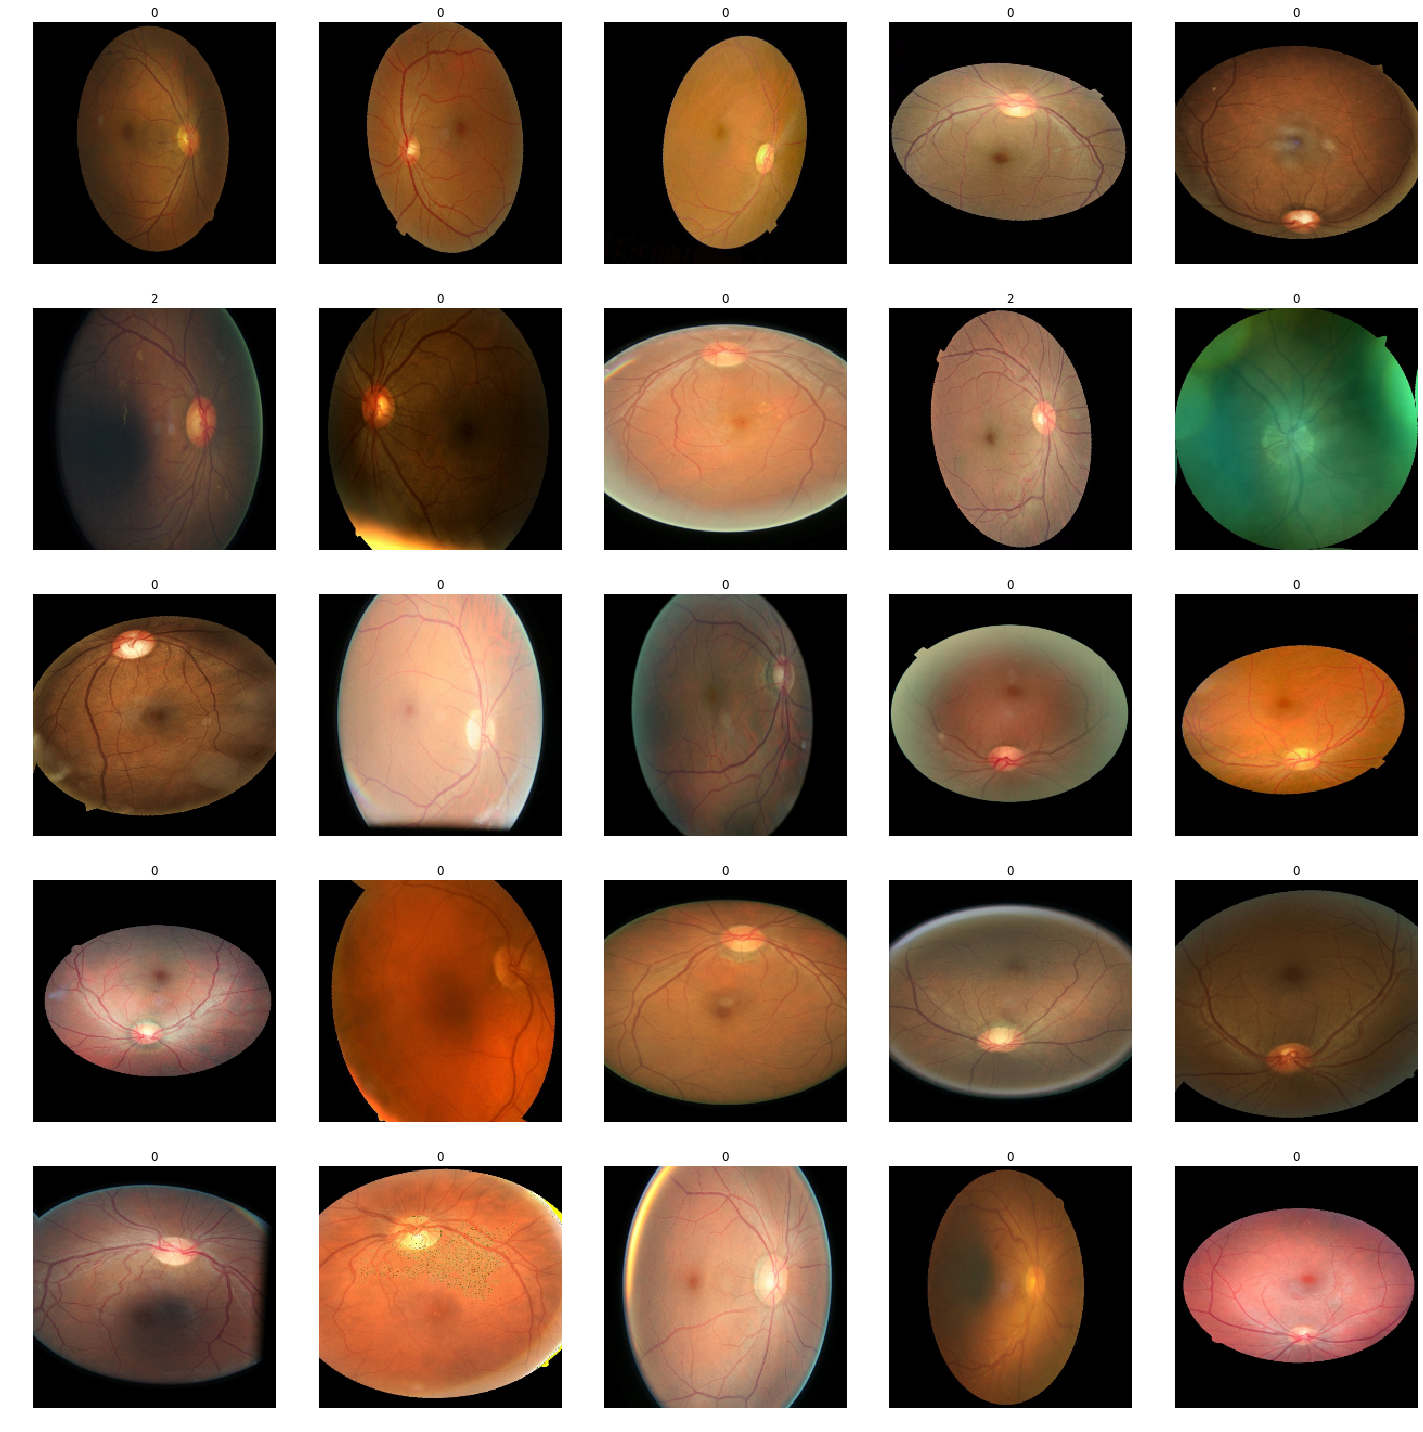

In [0]:
data.show_batch()

# Predicting results

In [0]:
model.save('dnet121_[1,2]_3_4')

1
2
3
5
6
7
9


36.041666666666664